# Anwendung

## Lineare Regression

Lineare Regression ist eine statistische Methode zur Analyse von Beziehungen zwischen zwei oder mehreren Variablen, die eine lineare Beziehung aufweisen. Das Ziel der linearen Regression besteht darin, eine mathematische Gleichung zu finden, die den Zusammenhang zwischen einer abhängigen Variable (auch als Antwortvariable bezeichnet) und einer oder mehreren unabhängigen Variablen (auch als erklärende Variablen bezeichnet) beschreibt.

In der einfachsten Form der linearen Regression wird eine lineare Gleichung verwendet, um den Zusammenhang zwischen einer abhängigen Variablen $Y$ und einer einzigen unabhängigen Variablen $X$ zu modellieren: $Y = a + bX$ . Hierbei repräsentiert $b$ die Steigung der Linie (d.h. die Änderung in $Y$ pro Einheit $X$) und $a$ den y-Achsenabschnitt der Linie (d.h. den Wert von $Y$, wenn $X$ gleich Null ist).

In [2]:
%pip install -q ipywidgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interactive, widgets,interact_manual,interact,FloatSlider,Dropdown
import warnings
warnings.filterwarnings("ignore")

Das Ziel der linearen Regression ist es eine "optimale" Gerade durch eine Menge an Datenpunkten zu modellieren, die dann den Datensatz repräsentieren soll.

In [55]:
x = [1, 2, 3, 4]
y = [1, 3, 3, 5]

Für die vier Datenpunkte würde dies so aussehen:

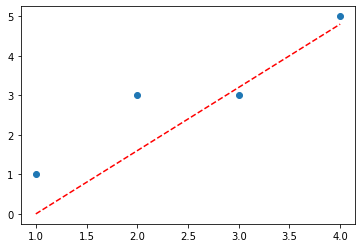

In [56]:
c = np.linspace(0,4,4)
plt.scatter(x,y)
plt.plot(x,1.2 * c, color="r",linestyle='dashed')

Hierbei stellt sich die Frage, was diese Gerade zur "optimalen" Gerade macht. Man versucht die Gerade so in die Punkte zu legen, so dass der Abstand zwischen den Punkten und der Gerade minimiert wird. Dieser Abstand wird hier $\epsilon$ genannt und ist im unteren Plot jeweils die gelbe Linie.

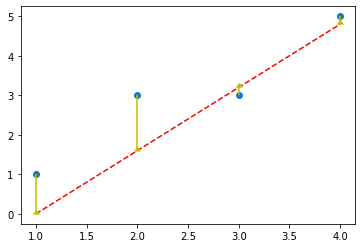

In [57]:
c = np.linspace(0,4,4)
plt.scatter(x,y)
plt.plot(x,1.2 * c, color="r",linestyle='dashed')
erorrs = plt.errorbar(x,y,yerr=1.2 * c - y, markersize=0,fmt=" ",lolims=True,uplims=False,color="y")

Der Fehler wird wie folgt berechnet
$$
\text{Fehler }  \epsilon_i = y_i - (\beta_0 + \beta_1 x_i) 
$$
. <br>
$ \beta_0 $ und $ \beta_1 $ sind hierbei die beiden Parameter der Geradengleichung die aufgestellt wird. Dieser Fehler soll dann minimiert werden. Die obige Gleichung kann dann als Matrixproblem definiert werden.
$$
\begin{bmatrix}
1 & x_1  \\
1 & x_2  \\
1 & x_3  \\
\cdot & \cdot  \\
1 & x_n  
\end{bmatrix}
\begin{bmatrix}
\beta_0   \\
\beta_1    
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2   \\
y_3  \\
\cdot \\
y_n 
\end{bmatrix}
$$
.

Hierbei soll gelten, dass
$$
\begin{bmatrix}
\beta_0 + \beta_1 x_1  \\
\beta_0 +\beta_1 x_2  \\
\beta_0 +\beta_1 x_3  \\
\cdot  \\
\beta_0 +\beta_1x_n  
\end{bmatrix}
$$
so gut wie möglich an
$$
\begin{bmatrix}
y_1 \\
y_2   \\
y_3  \\
\cdot \\
y_n 
\end{bmatrix}
$$
annähert.

Zusammengefasst heisst die Gleichung
$$
X\overrightarrow{\beta} = \overrightarrow{y}
$$
.<br>
Um dies zu lösen wird erst mit $X^T$ multipliziert
$$
X^T X\overrightarrow{\beta}= X^T \overrightarrow{y}
$$
.<br>
Und nochmal mit $(X^TX)^{-1}$ multipliziert.
$$
\overrightarrow{\beta} = (X^TX)^{-1} X^T \overrightarrow{y}
$$
. <br>
Nun hat man die Gleichung für $\overrightarrow{\beta}$. 

Nun wird $\overrightarrow{\beta}$ für die obigen Datenpunkte berechnet. In der ersten Berechnung wird nur <code>numpy</code> verwendet und in der zweiten wird die implementierte Methode von <code>sklearn</code> verwendet. 

Zuerst wird der Matrix $x$ eine weitere Spalte hinzugefügt die nur Einsen beinhaltet. Somit besitzt $X$ die Form wie Sie in der obigen Gleichung vorliegt.

In [19]:
x = [1, 2, 3, 4]
y = [1, 3, 3, 5]

In [58]:
X = np.matrix([[1, 1], 
               [1, 2],
              [1, 3],
              [1, 4]])
X

matrix([[1, 1],
        [1, 2],
        [1, 3],
        [1, 4]])

$X^T$

In [59]:
XT = np.matrix.transpose(X)
XT

matrix([[1, 1, 1, 1],
        [1, 2, 3, 4]])

$X^T X$

In [60]:
XT_X = np.matmul(XT, X)
XT_X

matrix([[ 4, 10],
        [10, 30]])

$(X^T X)^{-1} X^T$

In [64]:
X_S = np.matmul(np.linalg.inv(XT_X), XT)
X_S

matrix([[ 1. ,  0.5,  0. , -0.5],
        [-0.3, -0.1,  0.1,  0.3]])

$(X^T X)^{-1} X^T y$

In [65]:
betas = X_S.dot(y)
betas

matrix([[0. , 1.2]])

Für den vorliegenden Datensatz würde $\beta_0 = 0$ und $\beta_1 = 1,2$ sein. 

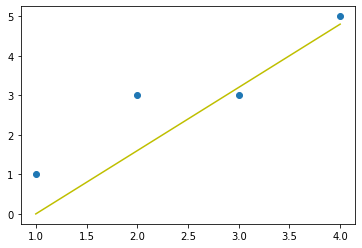

In [20]:
c = np.linspace(0,4,4)
plt.scatter(x,y)
out = plt.plot(x,1.2 * c, color="y")

Mit <code>sklearn</code> wird dies wie folgt berechnet. Man kann erkennen, dass die Berechnung die gleiche Gerade berechnet.

In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X = np.array([1, 2, 3, 4]).reshape(-1, 1), y = [1, 3, 3, 5])
print("Der y-Achsenabschnitt liegt bei ", str(regressor.intercept_), ". Dieser Wert ist nahezu 0.")
print("Die Steigung beträgt: ", str(regressor.coef_))

Der y-Achsenabschnitt liegt bei  8.881784197001252e-16 . Dieser Wert ist nahezu 0.
Die Steigung beträgt:  [1.2]


## Lineare Regression mit mehreren Variablen

Das Konzept für zwei Variablen kann auf eine beliebige Anzahl an Variablen übertragen werden. Die Rechneschritte bleiben die gleiche. Anstatt einer Gerade würde ab drei Dimensionen eine Ebene modelliert werden. Mit drei Dimensionen kan dies noch gut mit einem Plot veranschaulicht werden, aber alles darüber wird überaus schwierig.

Im folgenden Beispiel wird die lineare Regression auf einen Datensatz angewendet, welcher diverse Objekte auflistet die Starbucks anbietet. Hierbei sind jeweils die Nährwert aufgelistet.

Ein Einblick in den Datensatz:

In [12]:
data = pd.read_csv("starbucks.csv")
print(data.shape)
data.head()

(77, 8)


,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


Aufräumen des Datensatzes sowie dem Hinzufügen der Variable für den y-Achsenabschnitt.

In [13]:
data.dropna(inplace=True)
data["Intercept"] = 1
data.drop(["Unnamed: 0","item","type"],axis=1,inplace=True)
print(data.shape)
data.head()

(77, 6)


,calories,fat,carb,fiber,protein,Intercept
0,350,8.0,67,5,10,1
1,350,9.0,64,7,6,1
2,420,20.0,59,0,5,1
3,490,19.0,75,4,7,1
4,130,6.0,17,0,0,1


Als abhängige Varibale wird die Spalte <code>calories</code> verwendet. Damit wird $Y$ diese Spalte repräsentieren und $X$ wird jede andere Spalte beinhalten. 

In [15]:
Y = data["calories"].values
X = data[data.keys().drop("calories")].values

Nun können alle Schritte wie oben durchgeführt werden.

In [25]:
XT = np.matrix.transpose(X)
XT_X = np.matmul(XT, X)
XT_X_inv = np.linalg.inv(XT_X)
XT_S = np.matmul(XT_X_inv, XT)

In [26]:
betas = XT_S.dot(Y)
betas

array([ 8.95350798,  3.84205987, -0.02447185,  3.99789342,  5.33359994])

Nochmal mit der vorimplementieren Funktion aus sklearn. Und man kann erkennen, dass die gleichen Werte berechnet wurden.

In [24]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X = X, y = Y)
print("Der y-Achsenabschnitt liegt bei ", str(regressor.intercept_))
print("Die Steigungen betragen: ")
regressor.coef_

Der y-Achsenabschnitt liegt bei  5.333599943111608
Die Steigungen betragen: 


array([ 8.95350798,  3.84205987, -0.02447185,  3.99789342,  0.        ])

## Aufgaben

In dieser Aufgabe sollen Sie den Starbucks Datensatz aus dem vorherigen Beispiel wieder verwenden und ihn visualisieren.

In [4]:
# Lesen Sie den Datensatz wieder ein
data = pd.read_csv("starbucks.csv") # 

print(data.shape)
data.head() 

(77, 8)


,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


Da eine Visualisierung mit mehr als drei Variablen nicht leicht visualisierbar ist, sollen Sie sich drei Variablen aus dem Datensatz aussuchen. Wählen Sie für $Y$ eine Spalte aus die das Target sein soll und zwei Spalten die die die unabhängigen Variablen repräsentieren sollen.

In [5]:
# ???
feature1 = 
feature2 = 
target = 

Y = data[target].values 
X = data[[feature1,feature2]].values 

Als nächstes müssen Sie die Gerade aufstellen. Nutzen Sie hierfür die Blibiothek von <code>sklearn.linear_model.LinearRegression</code>.

In [6]:
from sklearn.linear_model import LinearRegression
# ???
regressor = 
print("Der y-Achsenabschnitt liegt bei ", str(regressor.intercept_))
print("Die Steigungen betragen: ")
regressor.coef_

Der y-Achsenabschnitt liegt bei  163.9709082639968
Die Steigungen betragen: 


array([10.42520716,  3.30619243])

Da mehr als zwei Variablen verwendet wurden, ist die berechnete lineare Regression keine Gerade mehr sondern eine Ebene. Das wird folgend in einem 3D-Plot visualisiert. Die Ebene wird in hellblau dargestellt und die verwendeten Datenpunkte in rot. Sie können mit dem Parameter <code>theta</code> die Ansicht des Plots verändern. Zudem können Sie die jeweils verwendeten Daten für die features und dem target verändern.

In [17]:
remove_idx = [0, 1, -1]
feature_list = np.delete(data.columns, remove_idx)

one = Dropdown(options=feature_list,value=feature1)
two = Dropdown(options=feature_list,value=feature2)
tar = Dropdown(options=feature_list,value=target)
button = widgets.Button(description='Animation erstellen')



def update(theta,feature_1,feature_2,target):
    feature1 = feature_1
    feature2 = feature_2
    target = target
    Y = data[target].values 
    X = data[[feature1,feature2]].values
    regressor = LinearRegression().fit(X = X, y = Y)
    x = X[:, 0]
    y = X[:, 1]
    x_surf, y_surf = np.meshgrid(np.linspace(x.min(), x.max(), 100),np.linspace(y.min(), y.max(), 100))
    onlyX = pd.DataFrame({feature1: x_surf.ravel(), feature2: y_surf.ravel()})
    fittedY = regressor.predict(onlyX)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[feature1],data[feature2],data[target],c='red', marker='o', alpha=0.5)
    ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    ax.view_init(azim=theta, elev=20)

    def rotate(angle):
        ax.view_init(azim=angle)
    rot_animation = FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
    def on_button_clicked(_):
        rot_animation.save('rotation2.gif', dpi=80, writer='FFMpegFile')
    button.on_click(on_button_clicked)

    plt.show()
    
widgets.HBox([interactive(update, theta = (0,360,25,),feature_1 = one,feature_2 = two, target = tar),button])

![Title](rotation.gif)